In [3]:
import pandas as pd

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("/home/julio/Escritorio/iris.data",header=None)

In [6]:
y=df.iloc[0:100,4].values

In [7]:
y=np.where(y=="Iris-setosa",0,1)

In [8]:
X=df.iloc[0:100,[0,2]].values
print(type(X))
type((array([0,0,1]), 0))
#tuple(zip(X,y))
a=np.zeros(2)
print(a)

<class 'numpy.ndarray'>
[ 0.  0.]


In [15]:
from random import choice
from numpy import array, dot, random

def perceptron():
    unit_step = lambda x: 0 if x < 0 else 1

    #training_data = [
    #    (array([0,0,1]), 0),
    #    (array([0,1,1]), 1),
    #    (array([1,0,1]), 1),
    #    (array([1,1,1]), 1),
    #]
    training_data= tuple(zip(X,y))

    w = random.rand(2)
    #w=np.zeros(2)
    errors = []
    eta = 0.1
    n = 100

    for i in range(n):
        x, expected = choice(training_data)
        result = dot(w, x)
        error = expected - unit_step(result)
        errors.append(error)
        w += eta * error * x
        #print (w,x)
    for x, _ in training_data:
        result = dot(x, w)
        #print("{}: {} -> {}".format(x[:2], result, unit_step(result)))

In [16]:
perceptron()

In [103]:
plt.plot(range(1, len(errors)+1), errors, marker="o")

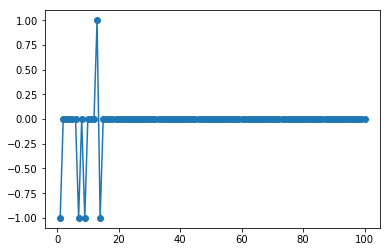

In [104]:
plt.show()


In [95]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier,resolution=0.02):
    markers = ('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    x1_min,x1_max = X[:,0].min()-1, X[:,0].max() + 1
    x2_min,x2_max = X[:,1].min()-1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min,x2_max, resolution))
    
    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    
    plt.contourf(xx1,xx2,Z,alpha = 0.4,cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],edgecolors="black" ,alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)
    